In [1]:
import os
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#### LOADING IMAGES
"path" should give the absolute path to your images. The directory should contain only your images that have been z-projected and cropped to the edges of the embryos. You will have to run this script once for each group, and all images for one group should be placed in the same directory. This will only work for 2-cell embryos. Ensure that all images are placed in the same orientation (i.e. anterior cell on the left)

In [2]:
path = "/Users/amoore/projects/01_DATASETS/nalyt_2cell"

dir_names = os.listdir(path)
dir_names = [os.path.join(path, name) for name in dir_names if not name.startswith(".")]

In [3]:
dir_names

['/Users/amoore/projects/01_DATASETS/nalyt_2cell/DHC-1_2-cells',
 '/Users/amoore/projects/01_DATASETS/nalyt_2cell/BMk-1_2-cells',
 '/Users/amoore/projects/01_DATASETS/nalyt_2cell/L4440_2-cells']

#### CHANNEL

Set 'channel_number' to be the index of your channel of interest. Keep in mind that this value will be offset by 1 (your first channel has index 0 and so on).

In [4]:
# 1 Dimensional Interpolation function. Takes array of length N and returns interpolated value array of length M

def _interp1d(array, new_len):
        la = len(array)
        return np.interp(np.linspace(0, la - 1, num=new_len), np.arange(la), array)

In [70]:
def make_wide(df):
    wide = df.pivot("pos", "sample").T
    wide.reset_index(inplace=True)
    final = wide.iloc[:, 2:]
    return final.T

In [58]:
def process(path):
    img_names = os.listdir(path)
    img_names = [name for name in img_names if '.png' in name]

    imgs = [io.imread(os.path.join(path, imname)) for imname in img_names]

    flat = []

    #Collapse the images to 1 dimension by summing the columns at each row position.
    for i, img in enumerate(imgs):
        flat.append(np.sum(img,axis=0))

    # Loop through all 1 dimensional data and interpolate to 500 points 
    # (500 is chosen as most embryos will be approximately 500 pixels wide)
    flat_ints = []

    for i, f in enumerate(flat):
        flat_ints.append(_interp1d(f, 500))

    # This cell creates a dataframe that will play nice with seaborn's lineplot function.

    flat_ints = [f / np.max(f) for f in flat_ints]
    
    dfs = []

    for i, f in enumerate(flat_ints):

        df = pd.DataFrame(f)
        df.rename(columns={0: "intensity"}, inplace=True)
        df["pos"] = list(range(1, 501))
        df["sample"] = i+1
        dfs.append(df)

    plotting_df = pd.concat(dfs, axis=0)

    return plotting_df

In [59]:
BMK_1 = process(dir_names[0])
DHC_1 = process(dir_names[1])
L4440 = process(dir_names[2])

In [71]:
BMK_1_W = make_wide(BMK_1)
DHC_1_W = make_wide(DHC_1)
L4440_W = make_wide(L4440)

/var/folders/6s/gfdfmtws7z3_vh932bxspdnw0000gn/T/ipykernel_89471/3020208599.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  wide = df.pivot("pos", "sample").T
/var/folders/6s/gfdfmtws7z3_vh932bxspdnw0000gn/T/ipykernel_89471/3020208599.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  wide = df.pivot("pos", "sample").T
/var/folders/6s/gfdfmtws7z3_vh932bxspdnw0000gn/T/ipykernel_89471/3020208599.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  wide = df.pivot("pos", "sample").T


#### Plotting

This seaborn plot shows the average value at each position with the 95% Confidence interval shaded. See the seaborn documentation for customization of the figure. Place a string containing the save path into the variable save if you want to save the figure. 

In [20]:
save = None

In [20]:
def make_seaborn_lineplot(data):
    ax = sns.lineplot(data=data, x="pos", y="intensity")
    ax.set(ylabel="Mean Intensity",
        xlabel = "Anterior-Posterior Position (pixels)",
        title = "Your title");
    return ax

<Axes: xlabel='pos'>

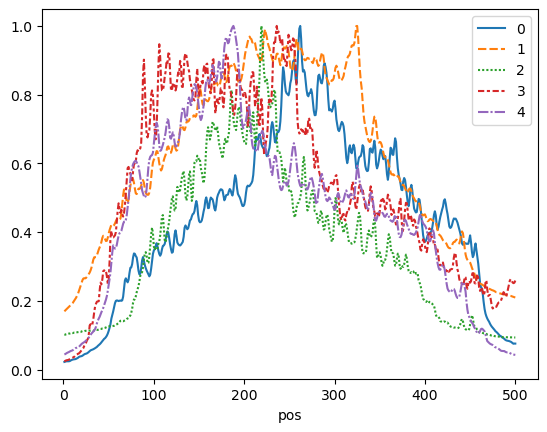

In [69]:
sns.lineplot(data=final.T.iloc[:, :5])

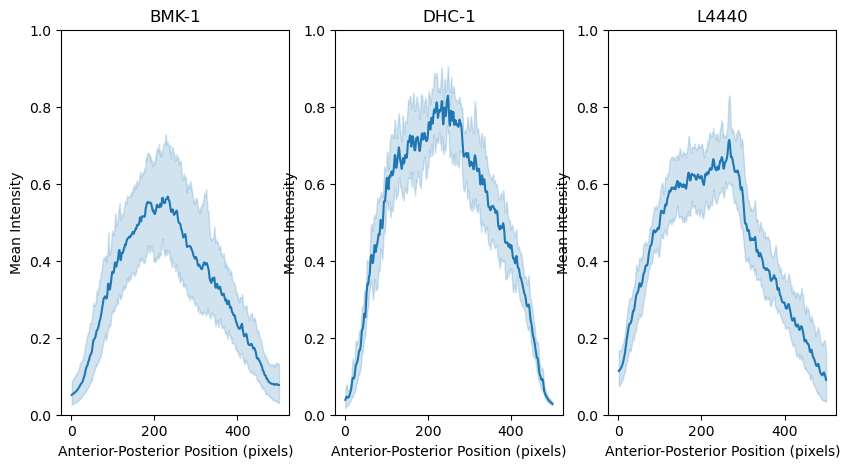

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
ax1 = sns.lineplot(data=BMK_1, x="pos", y="intensity", ax=axes[0])
ax1.set(ylabel="Mean Intensity",
    xlabel = "Anterior-Posterior Position (pixels)",
    title = "BMK-1",
    ylim = (0,1));

ax2 = sns.lineplot(data=DHC_1, x="pos", y="intensity", ax=axes[1])
ax2.set(ylabel="Mean Intensity",
    xlabel = "Anterior-Posterior Position (pixels)",
    title = "DHC-1",
    ylim = (0,1));

ax3 = sns.lineplot(data=L4440, x="pos", y="intensity", ax=axes[2])
ax3.set(ylabel="Mean Intensity",
    xlabel = "Anterior-Posterior Position (pixels)",
    title = "L4440",
    ylim = (0,1));

fig.savefig("3panel.svg", dpi=300)

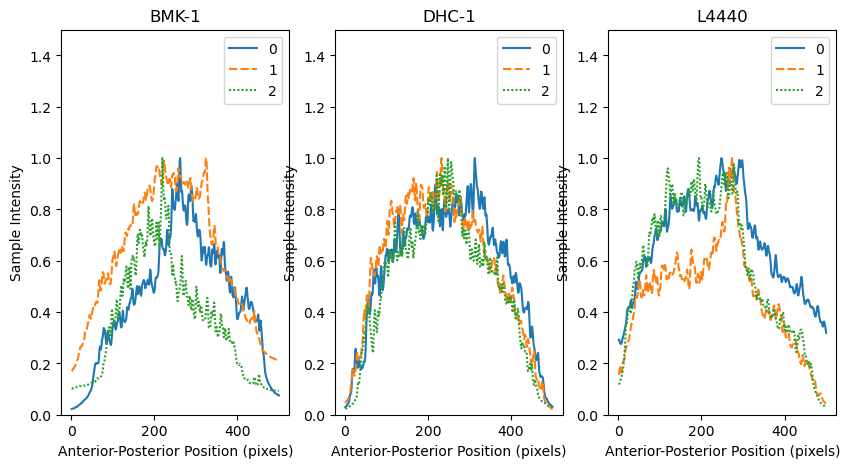

In [74]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
ax1 = sns.lineplot(data=BMK_1_W.iloc[:, :3], ax=axes[0])
ax1.set(ylabel="Sample Intensity",
    xlabel = "Anterior-Posterior Position (pixels)",
    title = "BMK-1",
    ylim = (0,1.5));

ax2 = sns.lineplot(data=DHC_1_W.iloc[:, :3], ax=axes[1])
ax2.set(ylabel="Sample Intensity",
    xlabel = "Anterior-Posterior Position (pixels)",
    title = "DHC-1",
    ylim = (0,1.5));

ax3 = sns.lineplot(data=L4440_W.iloc[:, :3], ax=axes[2])
ax3.set(ylabel="Sample Intensity",
    xlabel = "Anterior-Posterior Position (pixels)",
    title = "L4440",
    ylim = (0,1.5));

fig.savefig("3panel.svg", dpi=300)

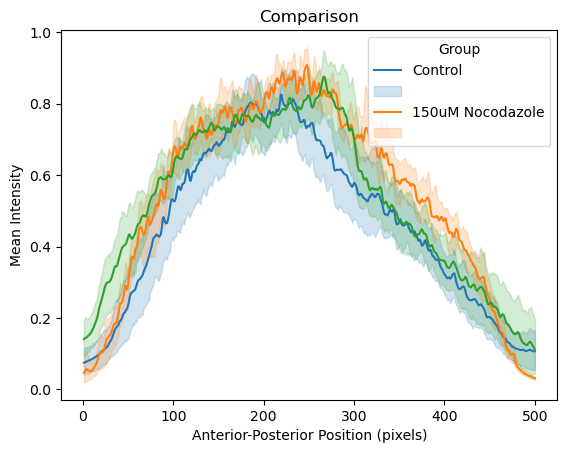

In [75]:
ax1 = sns.lineplot(data=BMK_1, x="pos", y="intensity", legend="full")
ax1.set(ylabel="Mean Intensity", 
    xlabel = "Anterior-Posterior Position (pixels)",
    title = "Control");

ax2 = sns.lineplot(data=DHC_1, x="pos", y="intensity", legend="full")
ax2.set(ylabel="Mean Intensity", 
    xlabel = "Anterior-Posterior Position (pixels)",
    title = "Comparison");

ax3 = sns.lineplot(data=L4440, x="pos", y="intensity", legend="full")
ax3.set(ylabel="Mean Intensity", 
    xlabel = "Anterior-Posterior Position (pixels)",
    title = "Comparison");

plt.legend(title="Group", loc="upper right", labels=["Control", "", "150uM Nocodazole", ""])


plt.savefig("1panel.svg", dpi=300)